# Chapter 12: Discriminant Analysis

In [124]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pylab as plt

from dmba import classificationSummary
from dmba import gainsChart, liftChart

import math
%matplotlib inline

In [125]:
# Working directory:
# replace the argument of the `Path`
DATA = Path('dmba')
# and then load data using 
# pd.read_csv(DATA / ‘filename.csv’)

## "Classification function" in Chapter 12 of the DMBA textbook is same as "disciminant function".

# Problem 12.1: Personal Loan Acceptance
Universal Bank is a relatively young bank growing
rapidly in terms of overall customer acquisition. The majority of
these customers are liability customers with varying sizes of
relationship with the bank. The customer base of asset customers is
quite small, and the bank is interested in expanding this base
rapidly to bring in more loan business. In particular, it wants to
explore ways of converting its liability customers to personal loan
customers.

A campaign the bank ran for liability customers last year showed a
healthy conversion rate of over 9\% successes. This has encouraged the
retail marketing department to devise smarter campaigns with better
target marketing. The goal of our analysis is to model the previous
campaign's customer behavior to analyze what combination of factors
make a customer more likely to accept a personal loan. This will serve
as the basis for the design of a new campaign.

The file _UniversalBank.csv_ contains data on 5000 customers. The data include customer demographic information (e.g., age, income), the customer's relationship with the bank (e.g., mortgage, securities account), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6\%)
accepted the personal loan that was offered to them in the previous campaign.

Partition the data (60\% training and 40\% validation) and then perform a discriminant analysis that models Personal Loan as a function of the remaining predictors (excluding zip code). Remember to turn categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (personal loan acceptance), and use the default cutoff value of 0.5.



In [126]:
bank_df = pd.read_csv(DATA / 'UniversalBank.csv')
bank_df = bank_df.drop(columns= ['ID', 'ZIP Code'])
outcome = 'Personal Loan'


In [127]:
X = bank_df.drop(columns=['Personal Loan'])
X = pd.get_dummies(X, columns=['Education'], drop_first=True)

In [128]:
y = bank_df['Personal Loan']
X.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Education_2', 'Education_3'],
      dtype='object')

In [129]:
X_train,X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)
print(X_train.shape)
print(X_valid.shape)

(3000, 12)
(2000, 12)


In [130]:
bank_lin = LinearDiscriminantAnalysis(priors=[0.904, 0.096])
bank_lin.fit(X_train, y_train)
print('Coefficients', bank_lin.coef_)
print('Intercept', bank_lin.intercept_)

Coefficients [[-1.38518713e-01  1.41669111e-01  5.52905393e-02  5.54820720e-01
   3.57975399e-01  1.50435277e-03 -1.35193439e+00  6.44591571e+00
  -5.11459814e-01 -7.83978984e-01  2.84535302e+00  2.96188568e+00]]
Intercept [-9.61170273]


In [131]:
#X_train.columns

In [132]:
bank_lin.intercept_

array([-9.61170273])

In [133]:
bank_lin.classes_

array([0, 1], dtype=int64)

In [134]:
bank_lin.coef_

array([[-1.38518713e-01,  1.41669111e-01,  5.52905393e-02,
         5.54820720e-01,  3.57975399e-01,  1.50435277e-03,
        -1.35193439e+00,  6.44591571e+00, -5.11459814e-01,
        -7.83978984e-01,  2.84535302e+00,  2.96188568e+00]])

In [135]:
bank_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [136]:
print('Coefficients and intercept')
fct = pd.DataFrame([bank_lin.intercept_], columns=['accept'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(bank_lin.coef_.transpose(), columns=['accept'], 
                              index=list(X.columns))])
print(fct)
print()
classificationSummary(y_train, 
                      bank_lin.predict(X_train),
                      class_names=bank_lin.classes_)
bank_df[outcome].value_counts()

Coefficients and intercept
                      accept
constant           -9.611703
Age                -0.138519
Experience          0.141669
Income              0.055291
Family              0.554821
CCAvg               0.357975
Mortgage            0.001504
Securities Account -1.351934
CD Account          6.445916
Online             -0.511460
CreditCard         -0.783979
Education_2         2.845353
Education_3         2.961886

Confusion Matrix (Accuracy 0.9450)

       Prediction
Actual    0    1
     0 2658   55
     1  110  177


Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [137]:
print('intercept ', bank_lin.intercept_[0])
print(pd.DataFrame({'coef' : bank_lin.coef_[0]}, index=X.columns).transpose())

intercept  -9.611702726015231
           Age  Experience    Income    Family     CCAvg  Mortgage  \
coef -0.138519    0.141669  0.055291  0.554821  0.357975  0.001504   

      Securities Account  CD Account   Online  CreditCard  Education_2  \
coef           -1.351934    6.445916 -0.51146   -0.783979     2.845353   

      Education_3  
coef     2.961886  


## Problem 12.1.a
Compute summary statistics for the predictors separately for loan acceptors and nonacceptors. For continuous predictors, compute the mean and standard deviation. For categorical predictors, compute the percentages. Are there predictors where the two classes differ substantially?

In [138]:
bank_df[y==1].describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,26.000000,0.000000,60.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,35.000000,9.000000,122.000000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,45.000000,20.000000,142.500000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,55.000000,30.000000,172.000000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [139]:
bank_df[y==0].describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.0,4520.000000,4520.000000,4520.000000,4520.000000
mean,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,11.450427,11.456672,40.578534,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,35.000000,1.000000,0.600000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,59.000000,2.000000,1.400000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,84.000000,3.000000,2.300000,3.000000,98.000000,0.0,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,8.800000,3.000000,635.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [140]:
bank_df[y==1].describe().loc[['mean', 'std'],:]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
mean,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,11.590964,11.582443,31.584429,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820


In [141]:
bank_df[y==0].describe().loc[['mean', 'std'],:]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
mean,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.0,0.102212,0.035841,0.595796,0.293584
std,11.450427,11.456672,40.578534,1.148771,1.567647,0.839975,92.038931,0.0,0.302961,0.185913,0.490792,0.455454


From the data above we can see that the income, Family, CCAvg, Education, and Mortgage is higher in the acceptor records 

## Problem 12.1.b
Examine the model performance on the validation set.
## Problem 12.1.b.i
What is the accuracy rate?

In [142]:
# print('Coefficients and intercept')
# fct = pd.DataFrame([bank_lin.intercept_], columns=['accept'], index=['constant'])
# fct = pd.concat([fct,pd.DataFrame(bank_lin.coef_.transpose(), columns=['accept'], 
#                               index=list(X.columns))])
# print(fct)
# print()
classificationSummary(y_valid, 
                      bank_lin.predict(X_valid),
                      class_names=bank_lin.classes_)
bank_df[outcome].value_counts()

Confusion Matrix (Accuracy 0.9440)

       Prediction
Actual    0    1
     0 1776   31
     1   81  112


Personal Loan
0    4520
1     480
Name: count, dtype: int64

the accuracy rate is 0.944

## Problem 12.1.b.ii
Is one type of misclassification more likely than the other?

A type two classifciation is more likely than a class one classifaction. False negative is more likley than a false postive. 

More likly to missclassify a acceptor as a non-acceptor

## Problem 12.1.b.iii
Select three customers who were misclassified as _acceptors_ and three who were misclassified as _nonacceptors_. The goal is to determine why they are misclassified. First, examine their probability of being classified as acceptors: is it close to the
threshold of 0.5? If not, compare their predictor values to the summary statistics of the two classes to determine why they were misclassified.

In [143]:
result_df = X_valid.copy()
result_df.index = result_df.index + 1
result_df['Actual'] = y_valid.copy()
#result_df['Dec. Function'] = bank_lin.decision_function(X_valid)
result_df['Prediction'] = bank_lin.predict(X_valid)
result_df['p(Accptor)'] = bank_lin.predict_proba(X_valid)[:, 1]

print(result_df)

      Age  Experience  Income  Family  CCAvg  Mortgage  Securities Account  \
2765   31           5      84       1    2.9       105                   0   
4768   35           9      45       3    0.9       101                   1   
3815   34           9      35       3    1.3         0                   0   
3500   49          23     114       1    0.3       286                   0   
2736   36          12      70       3    2.6       165                   0   
...   ...         ...     ...     ...    ...       ...                 ...   
4373   34          10      41       1    2.4         0                   0   
3402   39          15      28       1    1.4       118                   0   
1240   51          26      12       2    0.7       109                   0   
438    36           9      31       4    1.0         0                   1   
416    35           8      38       4    1.0       124                   0   

      CD Account  Online  CreditCard  Education_2  Education_3 

In [144]:
accpetors = result_df[result_df['Actual']== 0 ]
accpetors = accpetors[accpetors['Prediction']== 1].head(3)
accpetors

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Actual,Prediction,p(Accptor)
933,51,27,112,3,1.8,0,1,1,1,1,True,False,0.0,1,0.908392
4495,29,4,182,1,3.7,0,0,0,1,0,False,True,0.0,1,0.790934
1525,40,16,155,4,0.1,0,0,1,1,1,False,True,0.0,1,0.997652


In [145]:
nonaccpetors = result_df[result_df['Actual']== 1]
nonaccpetors = nonaccpetors[nonaccpetors['Prediction']== 0].head(3)
nonaccpetors

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3,Actual,Prediction,p(Accptor)
3945,56,26,62,3,1.4,0,0,0,1,0,False,True,1.0,0,0.003536
4590,31,7,13,1,0.5,0,0,0,1,0,False,True,1.0,0,0.000122
2672,62,37,128,1,2.5,0,0,0,0,0,False,False,1.0,0,0.011761


The accounts that are missclassified as acceptors look like records that would be acceptors; they they have CD accounts and Credit cards, have higher levels of income, and larger families. 

The accounts that are missclassied as non-acceptors look like records that would be non-acceptors; they have no security/CD/CreditCard accounts, lower incomes, and smaller families.

## Problem 12.1.c
As in many marketing campaigns, it is more important to identify customers who will accept the offer rather than customers who will not accept it. Therefore, a good model should be especially accurate at detecting acceptors. Examine the lift chart and decile-wise lift chart for the validation set and interpret them in light of this ranking goal.

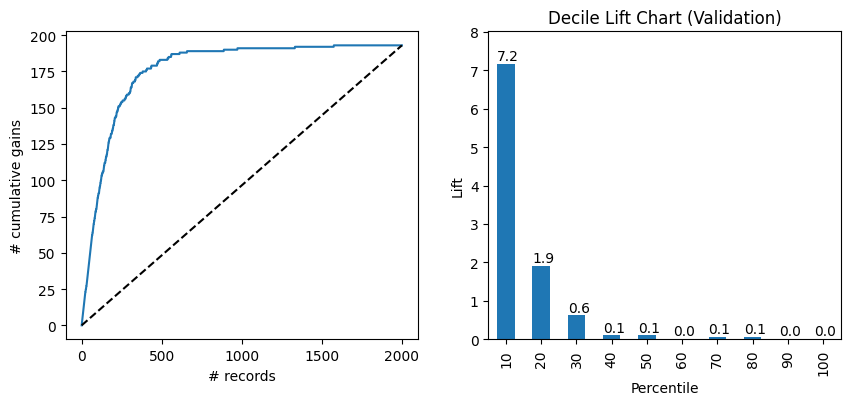

In [146]:
proba = bank_lin.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': bank_lin.predict(X_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation)') 
plt.show()

The gains chart shows us how much better the model is than a random guess at a given number of records. The Lift chart shows us that the model itself that anythinng in teh top 10% of records that are predicted to be accpetors are 7.2 times as liklly and the top 20% are 1.9 times as likley. This model appeares to be good at this job as it attrubutes the factors that make an accptor with alot of power making it more likley to predict a positive. 

## Problem 12.1.d
Compare the results from the discriminant analysis with those from a logistic regression (both with cutoff 0.5 and the same predictors). Examine the confusion matrices, the lift charts, and the decile charts. Which method performs better on your validation set in detecting the acceptors?

We can take the confusion matrix from the logistic regression model in chapter 10.
```
Confusion Matrix (Accuracy 0.9595)

       Prediction
Actual    0    1
     0 1791   16
     1   65  128
```

In [147]:
classificationSummary(y_valid, 
                      bank_lin.predict(X_valid),
                      class_names=bank_lin.classes_)

Confusion Matrix (Accuracy 0.9440)

       Prediction
Actual    0    1
     0 1776   31
     1   81  112


In [148]:
X2_train = sm.add_constant(X_train, prepend=True)
X2_valid = sm.add_constant(X_valid, prepend=True)
logit_reg_predictor = sm.GLM(np.asarray(y_train), np.asarray(X2_train, dtype= float), family= sm.families.Binomial())

In [149]:
#r = sm.GLM(np.asarray(y_train), np.asarray(X2_train), family=sm.families.Binomial())
logit_reg_result = logit_reg_predictor.fit()
logit_reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -340.15
Date:                Thu, 16 Nov 2023   Deviance:                       680.30
Time:                        22:55:29   Pearson chi2:                 8.10e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3325
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5634      2.336     -5.377      0.000     -17.143      -7.984
x1            -0.0354      0.086     -0.412      0.680      -0.204       0.133
x2             0.0369      0.086      0.431      0.666      -0.131       0.205
x3             0.0589      0.004     15.044      0.000       0.051       0.067
x4             0.6128      0.103      5.931      0.000       0.410       0.815
x5             0.2408      0.060      4.032      0.000       0.124       0.358
x6             0.0010      0.001      1.301      0.193      -0.001       0.003
x7            -1.0305      0.422     -2.443      0.015      -1.857      -0.204
x8             3.6628      0.460      7.961      0.000       2.761       4.565
x9            -0.6794      0.216     -3.140      0.002      -1.103      -0.255
x10           -0.9609      0.274     -3.507      0.000      -1.498      -0.424
x11            4.2075      0.364     11.573      0.000       3.495       4.920
x12            4.3580      0.365     11.937      0.000       3.642       5.074
==============================================================================
"""

In [150]:
predictions = logit_reg_result.predict(np.asarray(X2_valid,  dtype= float))
predictions_nom = [0 if x <0.5 else 1 for x in predictions]
classificationSummary(y_valid, predictions_nom)

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 1791   16
     1   64  129


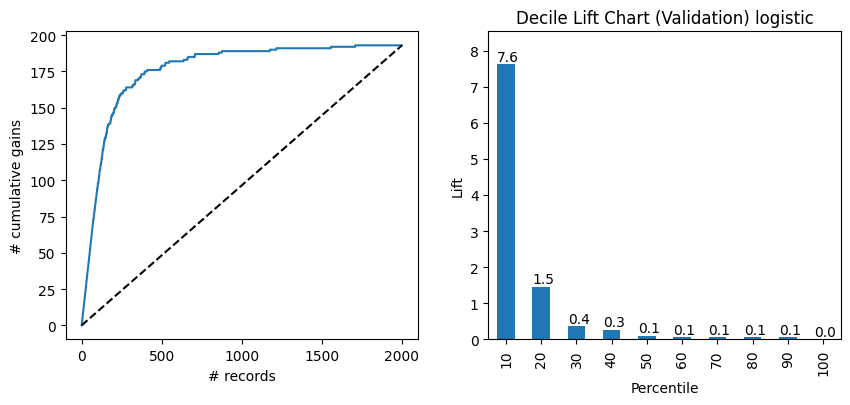

In [151]:
#proba = logit_reg_predictor.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': 1 - predictions,
                       'p(1)': predictions,
                       'predicted': predictions_nom})
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation) logistic')
plt.show()

The decil and lift charts are similar to the logistic regression method but an examination of the confusion matrix shows us that the logistic regression is slighly better at predicting the acceptors. logistic regression gives us 129 acceptors correctly classified to discriminant analysises 112. 

With logistic regression the top 10 percent of records are 7.6 times as likely to produce an acceptor than the 7.2 times as likely we would get with a top 10 percent record in discriminant analysis

## Problem 12.1.e
The bank is planning to continue its campaign by sending its offer to 1000 additional customers. Suppose that the cost of sending the offer is \\$1 and the profit from an accepted offer is \\$50. What is the expected profitability of this campaign?


In [152]:
#there are two ways this can be read. in the case of perfect analysis the max profit is as follows
#profit per success * number of successes (based on initial problem statement of (9.6% success)) - cost of sending the offer
(50*(1000*0.096))- 1000

3800.0

## Problem 12.1.f
The cost of misclassifying a loan acceptor customer as a nonacceptor is much higher than the opposite misclassification cost. To minimize the expected cost of misclassification, should the cutoff value for classification (which is currently at 0.5) be increased or decreased?

To combat the missclassifaction of nonacceptors in favor of comabting the missclassifaction of acceptors we should lower the cutoff value so that more values could be classified as acceptors. 

# Problem 12.3: Detecting Spam E-mail (from the UCI Machine Learning Repository)
A team at Hewlett-Packard collected data on a large number of e-mail messages from their postmaster and personal e-mail for the purpose of finding a classifier that can separate e-mail messages that are _spam_ vs. _nonspam_ (a.k.a. 'ham'). The spam concept is diverse: It includes advertisements for products or websites, 'make money fast' schemes, chain letters, pornography, and so on. The definition used here is 'unsolicited commercial e-mail.' The file _Spambase.csv_ contains information on 4601 e-mail messages, among which 1813 are tagged 'spam.' The predictors include 57 attributes, most of them are the average number of times a certain word (e.g., mail, George) or symbol (e.g., \#, !) appears in the e-mail. A few predictors are
related to the number and length of capitalized words.

## Problem 12.3.a
To reduce the number of predictors to a manageable size, examine how each predictor differs between the _spam_ and _nonspam_ e-mails by comparing the spam-class average and nonspam-class average. Which are the 11 predictors that appear to vary the most between _spam_ and _nonspam_ e-mails? From these 11, which words or signs occur more often in spam?

In [153]:
spam_df = pd.read_csv(DATA / 'Spambase.csv')
print(spam_df.head(4))
print(spam_df.columns)
print(spam_df.dtypes)

   make  address   all  W_3d   our  over  remove  internet  order  mail  ...  \
0  0.00     0.64  0.64   0.0  0.32  0.00    0.00      0.00   0.00  0.00  ...   
1  0.21     0.28  0.50   0.0  0.14  0.28    0.21      0.07   0.00  0.94  ...   
2  0.06     0.00  0.71   0.0  1.23  0.19    0.19      0.12   0.64  0.25  ...   
3  0.00     0.00  0.00   0.0  0.63  0.00    0.31      0.63   0.31  0.63  ...   

     C;     C(   C[     C!     C$     C#  CAP_avg  CAP_long  CAP_tot  Spam  
0  0.00  0.000  0.0  0.778  0.000  0.000    3.756        61      278     1  
1  0.00  0.132  0.0  0.372  0.180  0.048    5.114       101     1028     1  
2  0.01  0.143  0.0  0.276  0.184  0.010    9.821       485     2259     1  
3  0.00  0.137  0.0  0.137  0.000  0.000    3.537        40      191     1  

[4 rows x 58 columns]
Index(['make', 'address', 'all', 'W_3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will ', 'people', 'report', 'addresses',
       'free', 'business', 'email', 

In [154]:
spam_data = spam_df[spam_df['Spam'] == 1 ]
not_spam_data = spam_df[spam_df['Spam'] == 0 ]

In [155]:
differ = spam_data.mean() - not_spam_data.mean()
differ.abs().sort_values(ascending=False).head(12)

CAP_tot     309.148468
CAP_long     86.178780
CAP_avg       7.141864
george        1.263716
Spam          1.000000
you           0.994199
your          0.941668
hp            0.877994
free          0.444775
hpl           0.422822
C!            0.403729
our           0.332915
dtype: float64

Based on this list the predictors that differ the most between the spam and non-spam is [CAP_tot, CAP_long, CAP_avg, george, you, your, hp, free, hpl, C!, our]

In [156]:
differ.sort_values(ascending=False).head(30)

CAP_tot      309.148468
CAP_long      86.178780
CAP_avg        7.141864
Spam           1.000000
you            0.994199
your           0.941668
free           0.444775
C!             0.403729
our            0.332915
remove         0.266022
W_000          0.239967
business       0.239160
email          0.221936
all            0.203214
credit         0.197942
money          0.195741
font           0.192810
mail           0.183337
internet       0.169727
W_3d           0.163786
C$             0.162830
order          0.132012
over           0.130331
addresses      0.103762
receive        0.096723
people         0.081882
make           0.078859
C#             0.057164
report         0.041171
will           0.013649
dtype: float64

Comparing this list of the differnce in spam to the above one about the absolute value difference in spam. The following appear more in spam ['our', 'C!', 'free', 'your', 'you', 'CAP_avg', 'CAP_long', 'CAP_tot']

In [157]:
spam_prior = 1813/(4601)
non_spam_prior = 1- spam_prior

## Problem 12.3.b
Partition the data into training and validation sets, then perform a discriminant analysis on the training data using only the 11 predictors.

In [158]:
predictors = ['our', 'C!','hpl', 'free', 'hp', 'your', 'you ', 'george', 'CAP_avg', 'CAP_long', 'CAP_tot'] 
outcome = 'Spam'
#subset = predictors.append(outcome)
X = spam_df[predictors]
y = spam_df[outcome]


In [159]:
X_train,X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, random_state=1)
print(X_train.shape)
print(X_valid.shape)

(2760, 11)
(1841, 11)


In [160]:
predictors

['our',
 'C!',
 'hpl',
 'free',
 'hp',
 'your',
 'you ',
 'george',
 'CAP_avg',
 'CAP_long',
 'CAP_tot']

In [161]:
spam_lin = LinearDiscriminantAnalysis()
spam_lin.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [162]:
spam_lin.coef_

array([[ 6.75883468e-01,  4.39462081e-01, -3.16915182e-01,
         6.50457481e-01, -1.85640249e-01,  5.81145106e-01,
         1.86853238e-01, -9.43539189e-02,  4.22902842e-03,
         4.17051777e-04,  1.01505623e-03]])

In [163]:
spam_lin.intercept_

array([-2.07053468])

In [164]:
fct = pd.DataFrame([spam_lin.intercept_], columns=['Spam'], index=['constant'])
fct = pd.concat([fct,pd.DataFrame(spam_lin.coef_.transpose(), columns=['Spam'], 
                              index=list(predictors))])
print(fct)
print()
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)
spam_df[outcome].value_counts()

              Spam
constant -2.070535
our       0.675883
C!        0.439462
hpl      -0.316915
free      0.650457
hp       -0.185640
your      0.581145
you       0.186853
george   -0.094354
CAP_avg   0.004229
CAP_long  0.000417
CAP_tot   0.001015

Confusion Matrix (Accuracy 0.8332)

       Prediction
Actual    0    1
     0 1030   68
     1  239  504


Spam
0    2788
1    1813
Name: count, dtype: int64

## Problem 12.3.c
If we are interested mainly in detecting spam messages, is this model useful? Use the confusion matrix, lift chart, and decile chart for the validation set for the evaluation.

In [165]:
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)


Confusion Matrix (Accuracy 0.8332)

       Prediction
Actual    0    1
     0 1030   68
     1  239  504


In [166]:
#error rate: spam  
(239)/(504+239)

0.32166890982503366

This model has a high error rate for detecting spam

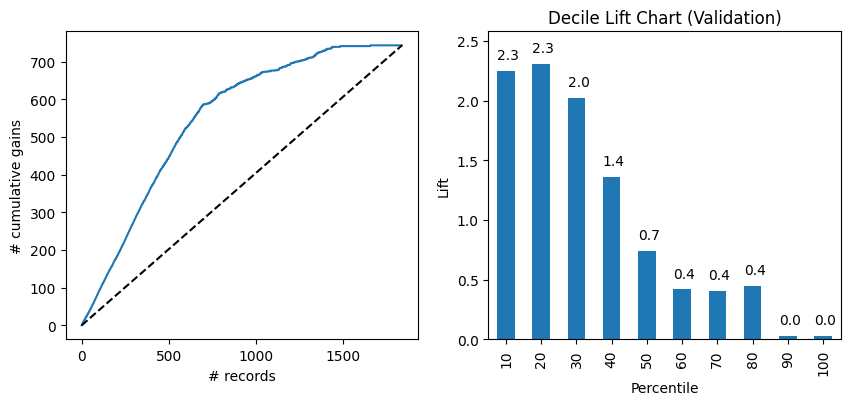

In [167]:
proba = spam_lin.predict_proba(X_valid)
result = pd.DataFrame({'actual': y_valid, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': spam_lin.predict(X_valid) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.title('Decile Lift Chart (Validation)')
plt.show()

The top 10 percent of records are 2.3 times more likley to detect spam than a random guess

## Problem 12.3.d
In the sample, almost 40\% of the e-mail messages were tagged as spam. However, suppose that the actual proportion of spam messages in these e-mail accounts is 10\%. Compute the intercept of the classification (discriminant) function to account for this information.

In [168]:
print(f'The intercept is : {spam_lin.intercept_}')
print(f'The priors of teh sample are : {spam_lin.priors_}')

The intercept is : [-2.07053468]
The priors of teh sample are : [0.61231884 0.38768116]


In [169]:
# to get new intecept and priors, get log diff in priors and add them back in as so
log_priors = np.log(spam_lin.priors_)
log_priors_10 = np.log([0.9, 0.1])
diff_log_prior = log_priors[1]- log_priors[0]
diff_log_prior_10 = log_priors_10[1]- log_priors_10[0]

In [170]:
print(f'Log prior diff for old distribution: {diff_log_prior}')
print(f'Log prior diff for new distribution: {diff_log_prior_10}')

Log prior diff for old distribution: -0.45706988046116737
Log prior diff for new distribution: -2.197224577336219


In [171]:
adjusted_intercept = spam_lin.intercept_ - diff_log_prior + diff_log_prior_10
print(f'Adjusted interecept for new prior: {adjusted_intercept}')

Adjusted interecept for new prior: [-3.81068937]


In [173]:
spam_linw = LinearDiscriminantAnalysis(priors=[0.9, 0.1])
spam_linw.fit(X_train, y_train)
spam_linw.intercept_

array([-3.81068937])

In [174]:
classificationSummary(y_valid, spam_linw.predict(X_valid))

Confusion Matrix (Accuracy 0.6594)

       Prediction
Actual    0    1
     0 1086   12
     1  615  128


## Problem 12.3.e
A spam filter that is based on your model is used, so that only messages that are classified as _nonspam_ are delivered, while messages that are classified as _spam_ are quarantined. In this case, misclassifying a nonspam e-mail (as spam) has much heftier results. Suppose that the cost of quarantining a nonspam e-mail is 20 times
that of not detecting a spam message. Compute the intercept of the classification (discriminant) function to account for these costs (<b>assume that the proportion of spam is reflected correctly by the sample proportion</b>).

In [175]:
log_priors = np.log(spam_lin.priors_)
diff_log_prior = log_priors[1]- log_priors[0]
adjusted_intercept = spam_lin.intercept_ + np.log(1/20)

In [176]:
print(f'Log prior diff for old distribution: {diff_log_prior}')
print(f'Intercept Prior to adjust : {spam_lin.intercept_}')
print(f'Intercept Post to adjust : {adjusted_intercept}')

Log prior diff for old distribution: -0.45706988046116737
Intercept Prior to adjust : [-2.07053468]
Intercept Post to adjust : [-5.06626695]


## Problem 12.3.f
Use the LinearDiscriminantAnalysis implementation in sklearn to adjust the priors to take the misclassification costs in 12.3.e into account. Does adjusting the priors to take the misclassification costs into account lead to a model which predicts fewer <i>nonspam</i> messages as <i>spam</i>? Report the numerical result.

In [177]:
non_spam_prior = spam_lin.priors_[0]
spam_prior = spam_lin.priors_[1]
non_spam_prior_new = (non_spam_prior * 20)/((non_spam_prior * 20)+ (spam_prior*1))
spam_prior_new = (spam_prior*1)/((non_spam_prior * 20)+ (spam_prior*1))

In [179]:
non_spam_prior_new

0.9693145970748495

In [178]:
spam_prior_new

0.03068540292515056

In [181]:
spam_lin = LinearDiscriminantAnalysis(priors=[non_spam_prior_new, spam_prior_new])
spam_lin.fit(X_train, y_train)
classificationSummary(y_valid, 
                      spam_lin.predict(X_valid),
                      class_names=spam_lin.classes_)

Confusion Matrix (Accuracy 0.6122)

       Prediction
Actual    0    1
     0 1092    6
     1  708   35


It does lead to less non_spam messages being marked as spam. with the number of non_spam emails missclassified as spam going down from 68 to 6